In [104]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [105]:
from Models.Components.UNet import *

In [106]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [107]:
net = UNet(device)

In [108]:
net = net.to(device)

In [109]:
net.load_state_dict(torch.load("./Models/Saves/UNet1.pt"))

<All keys matched successfully>

In [130]:
tsr = torch.randn(3, 208, 176)

In [118]:
tsr[None, :].shape

torch.Size([1, 3, 208, 176])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


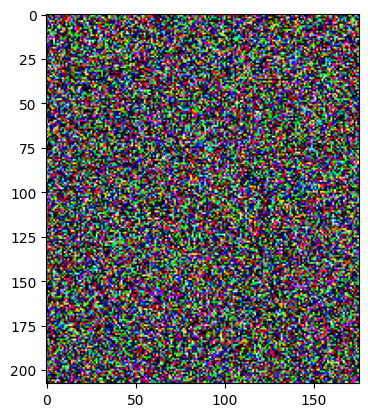

In [119]:
plt.imshow( (tsr).permute(1, 2, 0)  )

In [124]:
tsr = tsr[None, :].to(device)

In [125]:
tsr.shape

torch.Size([1, 3, 208, 176])

In [126]:
steps = [tsr.cpu()]

In [127]:
for i in range(19):
    
    tsr = net(tsr, i)
    steps.append(tsr.cpu())

In [128]:
len(steps)

20

In [134]:
final = steps[-1].detach()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


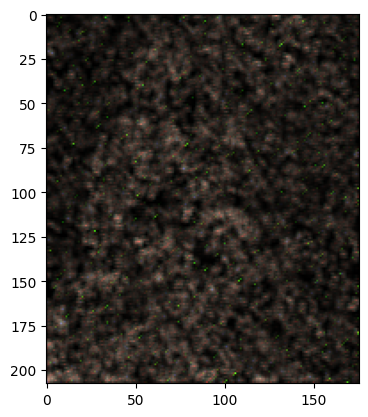

In [135]:
plt.imshow( (final[0]).permute(1, 2, 0)  )

In [131]:
tsr

tensor([[[ 0.5827,  0.5274, -0.1866,  ...,  0.9418, -1.9333, -0.6374],
         [ 1.4840, -0.9050,  0.3430,  ...,  1.7299, -0.5092, -1.1156],
         [-0.2962,  0.6373,  0.7030,  ...,  0.4562,  0.4168,  0.1672],
         ...,
         [ 1.1881, -0.1823, -1.8289,  ..., -0.5036, -1.1068,  0.8972],
         [ 0.7670, -1.7553, -2.2164,  ..., -0.8116,  0.2612,  0.8221],
         [ 1.4542, -0.4455, -0.6863,  ...,  1.7955, -0.8308,  0.4964]],

        [[-0.2876, -0.6512, -0.5751,  ..., -0.4962, -0.8368,  1.5639],
         [-2.3522,  0.1327, -1.6236,  ...,  1.0372, -0.8114,  1.6048],
         [-0.5272,  1.9089, -0.9973,  ..., -0.7223, -1.1375,  0.6067],
         ...,
         [-0.4010,  0.3433, -1.3958,  ..., -0.4570, -0.0602, -1.1592],
         [ 0.3818, -1.9620, -0.3718,  ..., -2.2022, -1.4930, -0.7706],
         [ 0.1411, -0.0752, -0.1454,  ...,  0.0123, -0.2164, -0.6529]],

        [[-0.3108, -0.3669, -0.3250,  ...,  0.3894, -0.1014,  0.2432],
         [-0.6451,  0.5605, -1.2613,  ...,  0

In [129]:
steps[-1]

tensor([[[[0.0400, 0.1011, 0.0503,  ..., 0.0560, 0.1234, 0.4496],
          [0.0275, 0.0836, 0.0845,  ..., 0.1410, 0.1475, 0.0568],
          [0.0937, 0.1693, 0.3020,  ..., 0.2012, 0.1562, 0.0622],
          ...,
          [0.5129, 0.7009, 0.6021,  ..., 0.1670, 0.1507, 0.1433],
          [0.5234, 0.7228, 0.5162,  ..., 0.1228, 0.1427, 0.0716],
          [0.3753, 0.5277, 0.3213,  ..., 0.1205, 0.1043, 0.0669]],

         [[0.0563, 0.0709, 0.0531,  ..., 0.1045, 0.1258, 0.0606],
          [0.0586, 0.0952, 0.0922,  ..., 0.1110, 0.1251, 0.0838],
          [0.0813, 0.1277, 0.1547,  ..., 0.1435, 0.1232, 0.1216],
          ...,
          [0.4266, 0.5237, 0.4901,  ..., 0.1394, 0.1244, 0.1047],
          [0.4677, 0.5298, 0.4371,  ..., 0.1098, 0.0946, 0.0601],
          [0.3239, 0.3541, 0.2751,  ..., 0.0881, 0.0685, 0.0812]],

         [[0.0503, 0.0647, 0.0408,  ..., 0.0835, 0.1139, 0.0486],
          [0.0502, 0.0741, 0.0731,  ..., 0.0937, 0.1085, 0.0786],
          [0.0681, 0.1142, 0.1292,  ..., 0

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

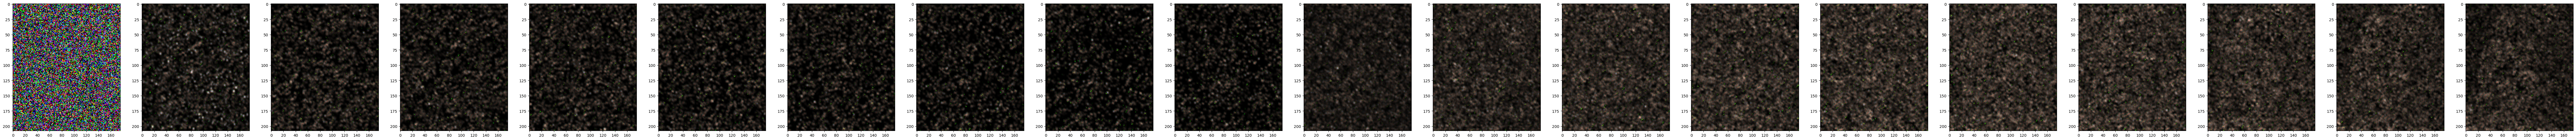

<Figure size 640x480 with 0 Axes>

In [137]:
fig, ax = plt.subplots(1, 20)
fig.set_figheight(10)
fig.set_figwidth(120)

for i in range(len(steps)):
    
    ax[i].imshow( steps[i][0].detach().permute(1, 2, 0) )
    
plt.show()
plt.savefig("test.png")

In [64]:
tsr

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],

         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],

         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]], device='cuda:0',
       grad_fn=<AddBackward0>)